<a href="https://colab.research.google.com/github/PON-AJITH-KUMAR-PONRAJ/Machine-Learning-Mini-Projects/blob/main/HandWritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [80]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [81]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [82]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [84]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.8798 - loss: 0.3900 - val_accuracy: 0.9859 - val_loss: 0.0430
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 56ms/step - accuracy: 0.9819 - loss: 0.0597 - val_accuracy: 0.9887 - val_loss: 0.0352
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9874 - loss: 0.0383 - val_accuracy: 0.9878 - val_loss: 0.0356
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9916 - val_loss: 0.0259
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9914 - val_loss: 0.0241


In [85]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9877 - loss: 0.0329

Test Accuracy: 0.9914


In [86]:
# Save the model
model.save("digit_recognition.keras")

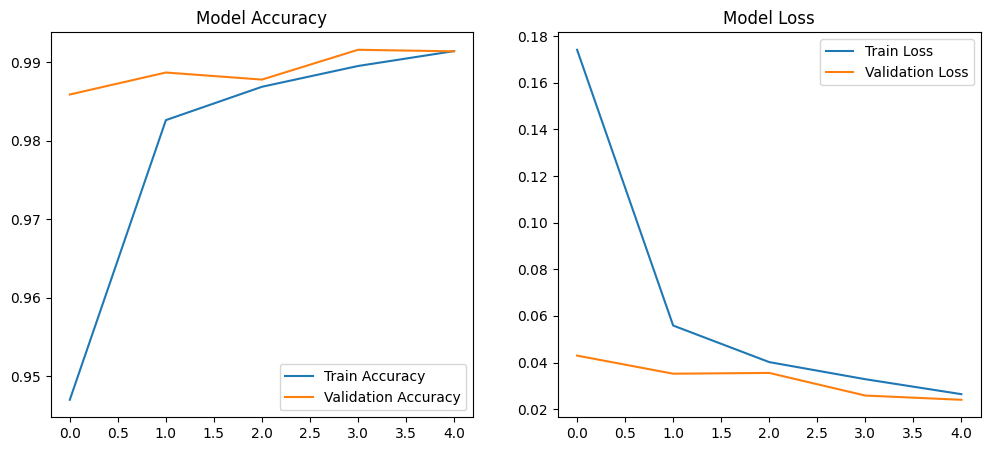

In [87]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [88]:
# Make predictions
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


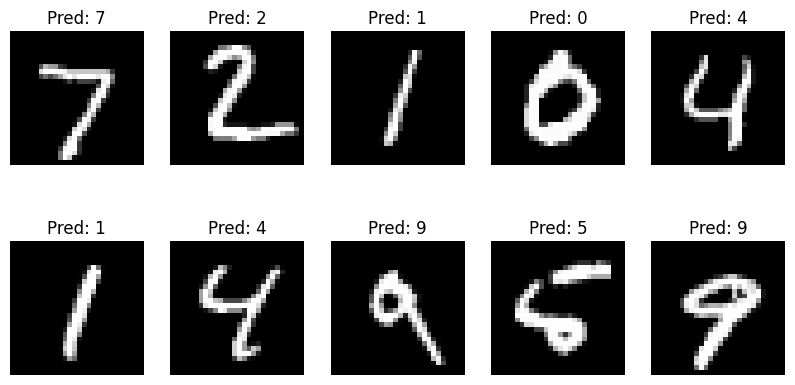

In [89]:
# Display some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"Pred: {predictions[i]}")
    axes[i].axis("off")

plt.show()

In [76]:
import pygame
import numpy as np
import cv2
from keras.models import load_model

# Initialize Pygame
pygame.init()

# Set up the window size
WINDOWSIZEX = 640
WINDOWSIZEY = 480
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Create a Pygame window
screen = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))
pygame.display.set_caption("Draw a Digit")
screen.fill(WHITE)

# Load the trained digit recognition model
model = load_model("digit_recognition.keras")

is_drawing = False
radius = 10

# Function to preprocess the drawn image for prediction
def preprocess_image():
    raw_data = pygame.surfarray.array3d(screen)
    gray = cv2.cvtColor(raw_data, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
    processed_image = resized.astype("float32") / 255.0
    processed_image = processed_image.reshape(1, 28, 28, 1)
    return processed_image

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        # Start drawing
        if event.type == pygame.MOUSEBUTTONDOWN:
            is_drawing = True

        # Stop drawing
        if event.type == pygame.MOUSEBUTTONUP:
            is_drawing = False

        # Erase screen
        if event.type == pygame.KEYDOWN and event.key == pygame.K_c:
            screen.fill(WHITE)

        # Predict digit
        if event.type == pygame.KEYDOWN and event.key == pygame.K_p:
            processed_image = preprocess_image()
            prediction = np.argmax(model.predict(processed_image))
            print(f"Predicted Digit: {prediction}")

    # Draw when the mouse moves while pressed
    if is_drawing:
        pos = pygame.mouse.get_pos()
        pygame.draw.circle(screen, BLACK, pos, radius)

    pygame.display.update()

pygame.quit()